In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

#We need to change it to list
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [33]:
df[["job_title_short", "job_skills"]].tail()


,job_title_short,job_skills
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."
785740,Software Engineer,"[aws, flow]"


<AxesSubplot:>

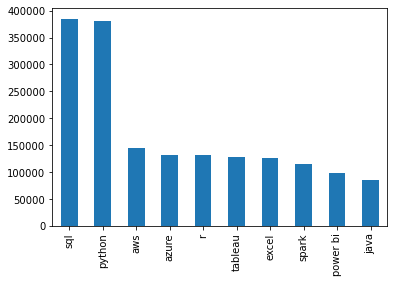

In [34]:
df_exploded = df.explode("job_skills")
df_exploded["job_skills"].value_counts().head(10).plot(kind="bar")

In [35]:
skill_counter = df_exploded.groupby(["job_title_short", "job_skills"]).size()
skill_counter

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [36]:
#we will change its type from series to dataframe
type(skill_counter)

pandas.core.series.Series

In [37]:
df_skill_counter = skill_counter.reset_index(name="skill_counter")
df_skill_counter

,job_title_short,job_skills,skill_counter
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [38]:
df_skill_counter = df_skill_counter.sort_values("skill_counter", ascending=False)
df_skill_counter

,job_title_short,job_skills,skill_counter
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [39]:
job_title = "Data Analyst"
counter = 10

df_skill_counter = df_skill_counter[df_skill_counter.job_title_short == job_title].head(counter)
df_skill_counter

,job_title_short,job_skills,skill_counter
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


<AxesSubplot:ylabel='job_skills'>

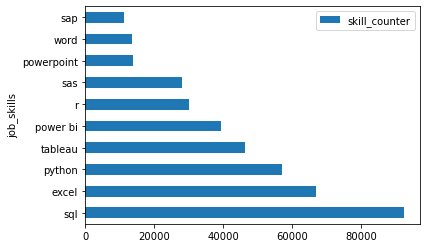

In [43]:
df_skill_counter.plot(kind="barh", x="job_skills", y="skill_counter")


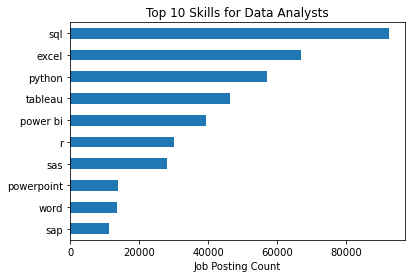

In [46]:
df_skill_counter.plot(kind="barh", x="job_skills", y="skill_counter")
plt.gca().invert_yaxis()
plt.title(f"Top {counter} Skills for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)